In [11]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split,StratifiedKFold
import warnings

rcParams['figure.figsize'] = (16, 8)
pd.options.display.max_columns = 100

In [12]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
display(train.head(), test.head())

,id,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
0,0,23.263956,20.336773,19.009500,17.672439,16.939607,-0.000081,23.12426,20.25779,18.95512,17.63211,16.90894,18,18,1.189764,1.190681,1.188979,1.189355,1.190206,0
1,1,15.052147,14.061969,13.452418,13.268450,13.168941,0.004506,14.96642,14.00452,13.41139,13.23625,13.13468,1,1,1.253254,1.257836,1.248762,1.250997,1.255533,1
2,2,16.786385,15.825426,15.536318,15.393535,15.350032,0.000472,16.60765,15.68659,15.44004,15.32173,15.29608,2,2,1.022499,1.024105,1.020983,1.021730,1.023291,0
3,3,25.660638,21.188727,20.221158,19.894949,19.634649,0.000006,25.35365,20.99465,20.08727,19.79465,19.55518,4,3,1.205399,1.206058,1.204874,1.205120,1.205712,0
4,4,24.453429,20.699170,19.042368,18.324152,17.982649,-0.000033,23.77140,20.43384,18.86299,18.19028,17.87592,13,12,1.193946,1.194285,1.193738,1.193826,1.194099,0


,id,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z
0,320000,19.143050,18.017200,17.473255,17.114411,16.926293,0.121303,19.07495,17.95495,17.43085,17.08381,16.90872,1,1,1.156348,1.151487,1.161321,1.158819,1.153902
1,320001,18.740910,17.170473,16.369084,15.986452,15.730708,-0.000067,15.07033,14.30976,14.39011,14.51600,14.63716,2,2,1.007637,1.007383,1.007975,1.007795,1.007500
2,320002,19.298048,17.880346,17.222135,16.809561,16.635239,0.110010,19.10036,17.77263,17.14601,16.74968,16.56888,1,1,1.380859,1.390490,1.371502,1.376145,1.385635
3,320003,18.077467,17.156943,16.904111,16.811800,16.795520,0.000030,17.97294,17.07353,16.84696,16.76995,16.76677,1,1,1.140796,1.140808,1.140903,1.140834,1.140787
4,320004,17.832467,16.764587,16.213526,15.872181,15.662084,0.068471,17.75447,16.67943,16.15628,15.83145,15.64335,2,2,1.111023,1.107658,1.114511,1.112750,1.109325


EDA

In [18]:
# class 0,1,2 의 분포
train["class"].value_counts()

2    157219
0    119996
1     42785
Name: class, dtype: int64

In [19]:
train.describe()

,id,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
count,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000
mean,159999.500000,19.852429,18.376837,17.735761,17.174226,16.875187,0.058308,19.628874,18.227087,17.615434,17.152347,16.869277,6.332700,6.138816,1.175763,1.176528,1.175131,1.175430,1.176128,1.116322
std,92376.187408,1.945548,31.110759,1.466242,52.561464,57.146264,0.575457,1.923586,17.786568,1.473020,25.075760,35.436549,8.881129,8.551634,0.116297,0.118065,0.114723,0.115485,0.117156,0.923455
min,0.000000,-17.687512,-17555.365606,7.731354,-23955.817764,-23955.817764,-166.048260,-42.837530,-9999.000000,-16.380230,-9999.000000,-9999.000000,1.000000,1.000000,1.000059,1.000012,1.000157,1.000105,1.000027,0.000000
25%,79999.750000,18.724150,17.474851,16.877190,16.523876,16.288890,0.000036,18.563598,17.348370,16.787138,16.453048,16.234063,1.000000,1.000000,1.088220,1.088448,1.087763,1.088021,1.088299,0.000000
50%,159999.500000,19.419439,18.140528,17.525850,17.149736,16.917610,0.047129,19.264635,18.022410,17.443415,17.087370,16.869390,2.000000,2.000000,1.179350,1.179235,1.179375,1.179377,1.179303,1.000000
75%,239999.250000,20.432092,19.073172,18.428089,18.007435,17.728924,0.094597,20.197603,18.888443,18.291078,17.906960,17.655653,5.000000,5.000000,1.227540,1.225990,1.229236,1.228599,1.226757,2.000000
max,319999.000000,58.623328,46.338272,72.009662,50.164052,52.612664,62.323343,30.777850,30.613170,31.957200,32.016220,30.781270,44.000000,42.000000,2.050775,2.080287,2.022134,2.036329,2.065390,2.000000


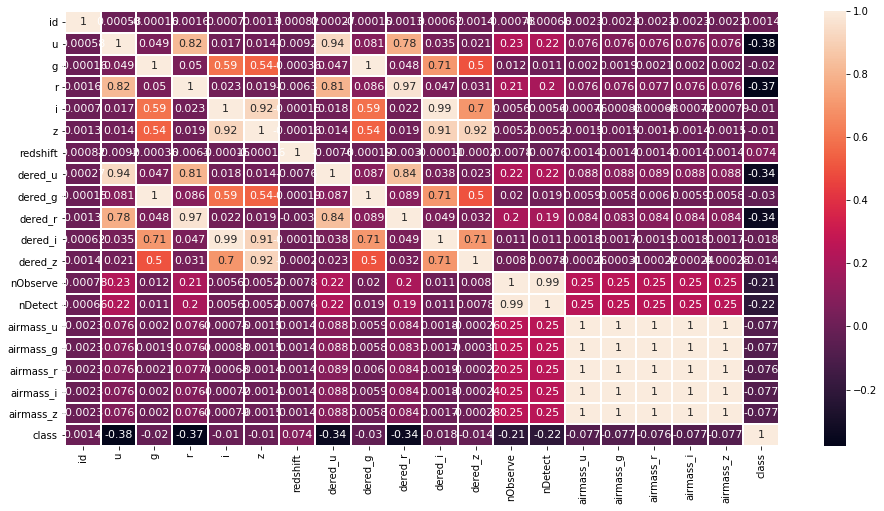

In [20]:
sns.heatmap(train.corr(), annot = True, annot_kws = {"size":11}, linewidths = 1)

C:\Users\scott\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


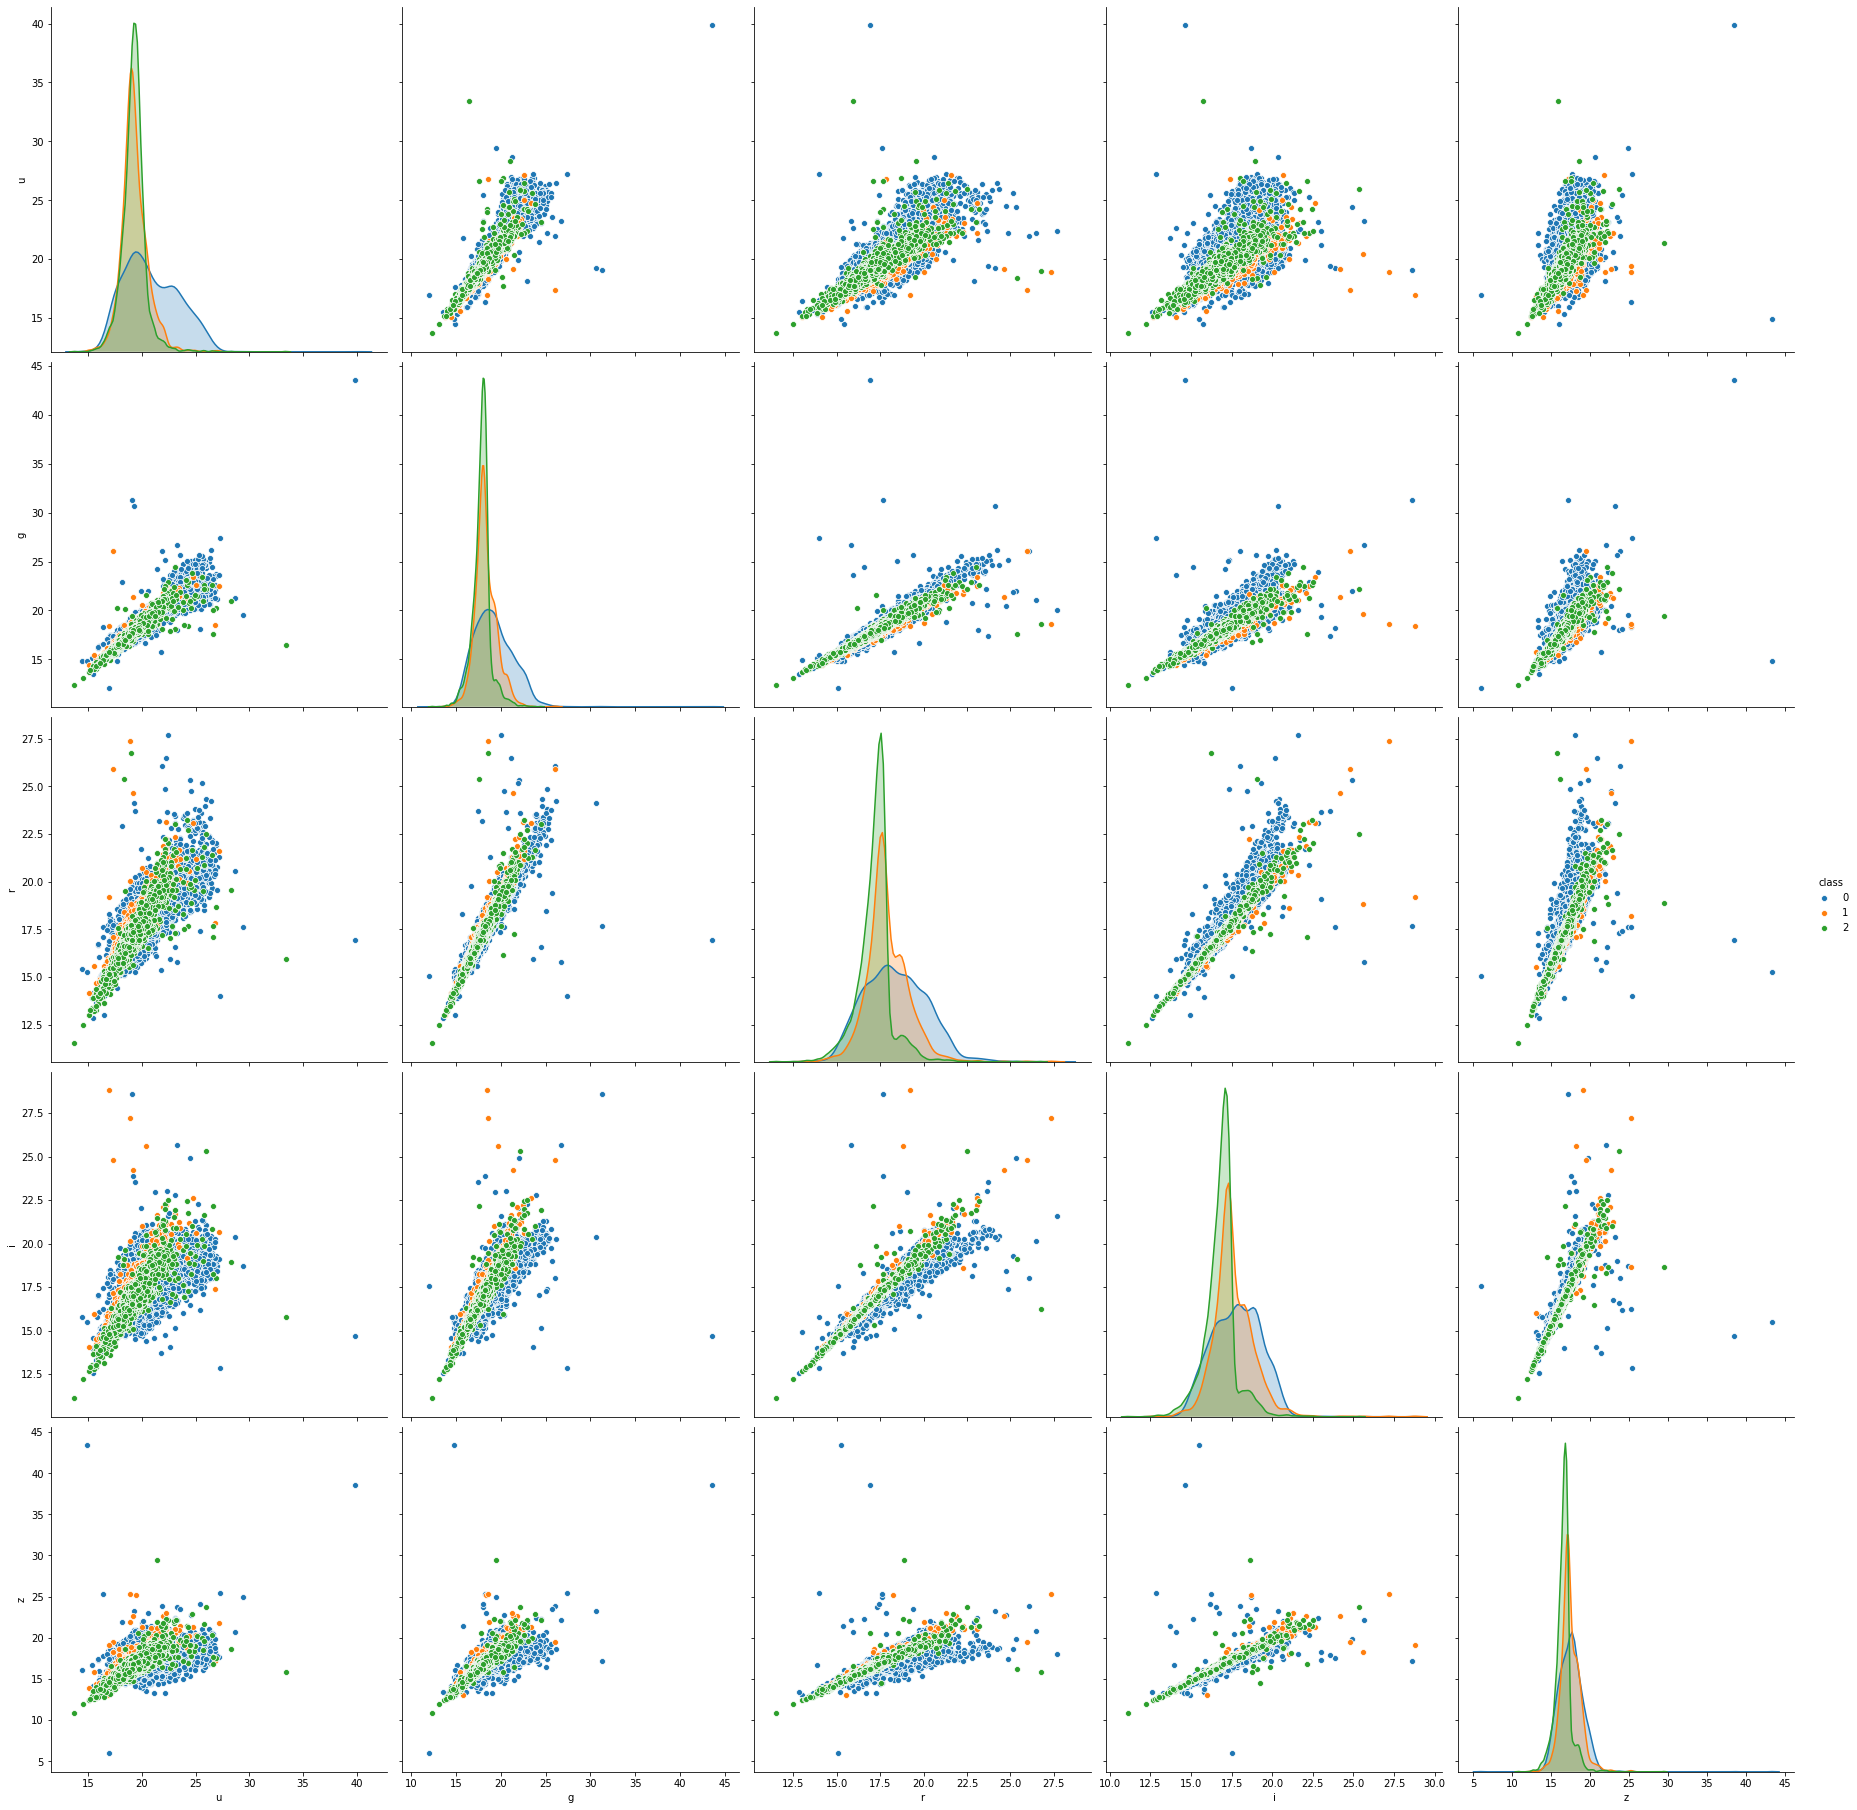

In [15]:
sample = train.sample(n=10000, random_state=42)
sns.pairplot(data=sample, vars=['u', 'g', 'r', 'i', 'z'], hue='class', size=5)

C:\Users\scott\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


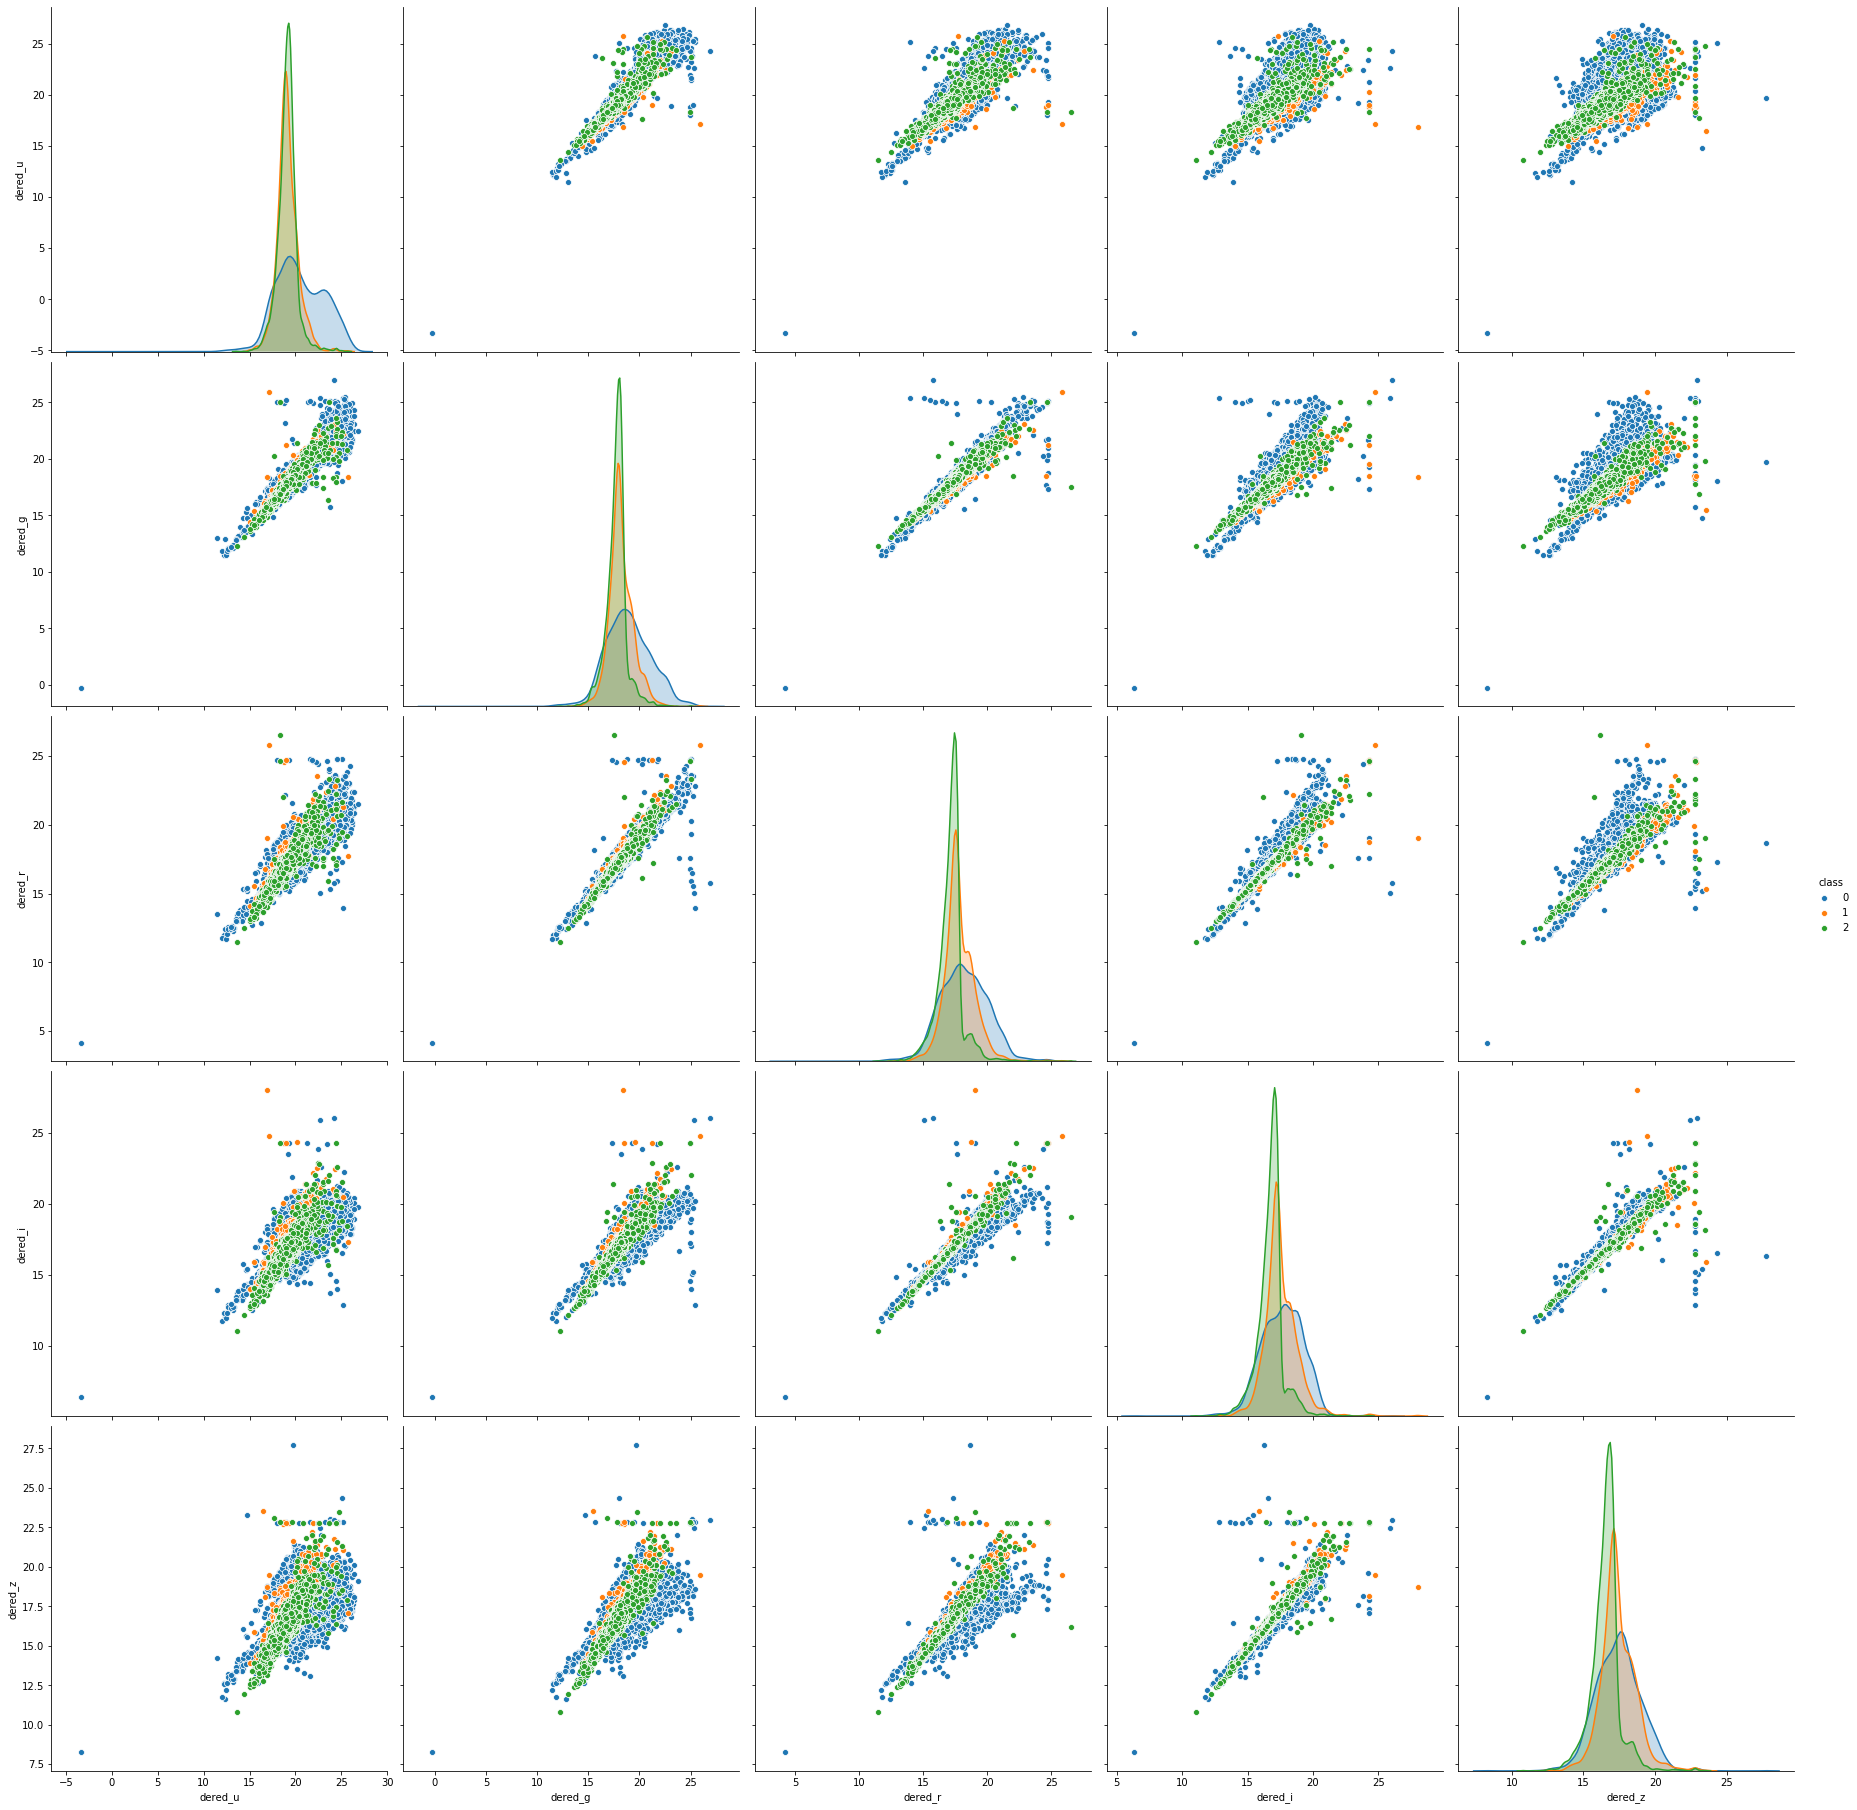

In [16]:
sns.pairplot(data=sample, vars=['dered_u', 'dered_g', 'dered_r', 'dered_i', 'dered_z'], hue='class', size=5)

C:\Users\scott\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


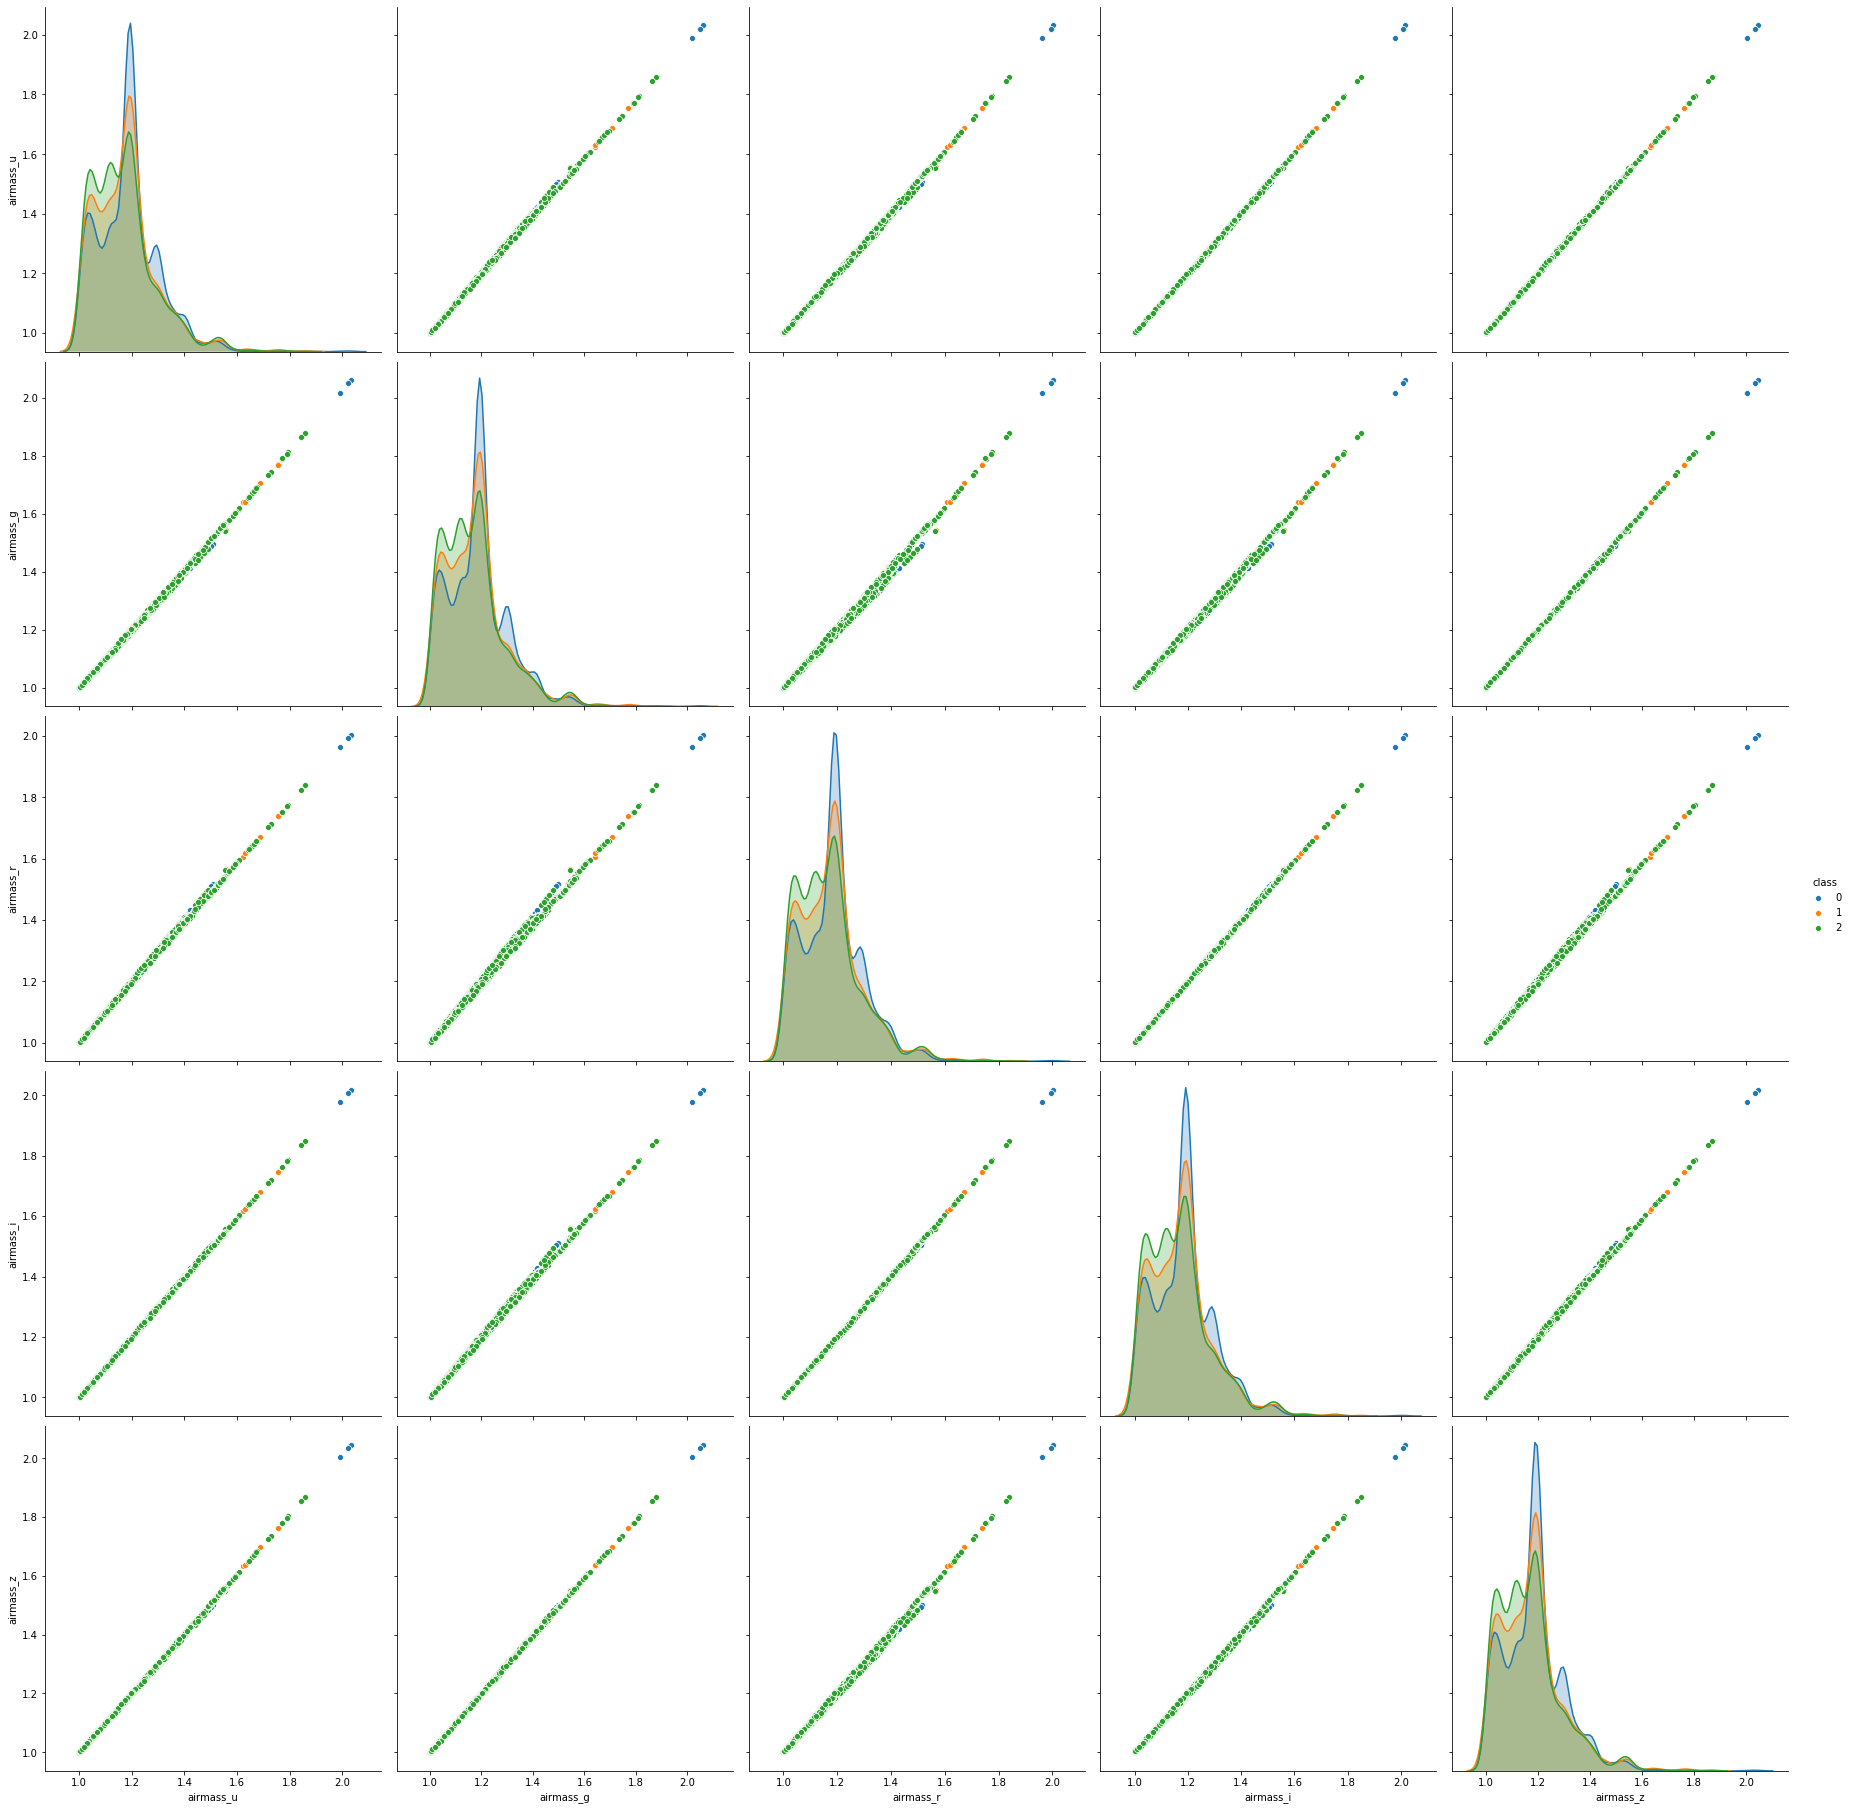

In [17]:
sns.pairplot(data=sample, vars=['airmass_u', 'airmass_g', 'airmass_r', 'airmass_i', 'airmass_z'], hue='class', size=5)

전처리

In [ ]:
# 동시에 전처리하기 위해 training data와 test data를 concatenate

df = pd.concat([train,test])
df.head()

In [ ]:
# Machine Learning Applied to Star–Galaxy–QSO Classification and Stellar Effective Temperature Regression 논문 참조 파생변수 생성

df["u-g"] = df["u"]-df["g"]
df["g-r"] = df["g"]-df["r"]
df["r-i"] = df["r"]-df["i"]
df["i-z"] = df["i"]-df["z"]

df["d1diff"] = df["dered_u"]-df["dered_g"]
df["d2diff"] = df["dered_g"]-df["dered_r"]
df["d3diff"] = df["dered_r"]-df["dered_i"]
df["d4diff"] = df["dered_i"]-df["dered_z"]

df["minusOD"] = df["nObserve"] - df["nDetect"]
df["plusOD"] = df["nObserve"] + df["nDetect"]

In [ ]:
# EDA 이후 불필요 칼럼, 상관관계, 다중공선성 등...을 고려하여 일부 피쳐 제거

df2 = df.drop(["id","class","airmass_u","airmass_g","airmass_r","airmass_i","airmass_z"], axis=1)
df2.head()

In [ ]:
# df를 train과 test의 크기만큼 다시 분리

train2 = df2[:len(train)]
test2 = df2[len(train):]

RandomForest모델 학습

In [ ]:
clf = RandomForestClassifier(n_estimators=400,
                             n_jobs=-1,
                             verbose = 1)

clf.fit(train2, train["class"])
rf_result = clf.predict_proba(test2)


Xgboost모델 학습

In [ ]:
# StratifiedKFold를 사용하여 교차검증

sfk = StratifiedKFold(n_splits = 10, random_state = 42, shuffle = True)
xgb_result = 0

for i,j in sfk.split(train2,train["class"]):
    x_train = train2.iloc[i]
    x_valid = train2.iloc[j]
    y_train = train["class"].iloc[i]
    y_valid = train["class"].iloc[j]

    xgb = XGBClassifier(objective='multiclass',
                         n_estimators = 500, 
                         max_depth = 9,
                         subsample = 1,
                         colsample_bytree = 1,
                         nthread= -1, 
                         )
    xgb.fit(x_train, y_train, eval_set = [(x_valid, y_valid)], early_stopping_rounds = 70)
    xgb_result += xgb.predict_proba(test2)/10


일정 비율 앙상블

In [ ]:
result = rf_result*0.4 + xgb_result*0.6
final = pd.DataFrame(result)

In [14]:
sub = pd.read_csv("sample_submission.csv")
sub["class"] = final.argmax(1)
sub.head()

,id,class
0,320000,0
1,320001,0
2,320002,0
3,320003,0
4,320004,0


In [ ]:
sub.to_csv("submission.csv", index=False)